<a href="https://colab.research.google.com/github/blankieblank/Algorithms-in-bioinformatics/blob/main/reconstruction-of-the-phylogenetic-tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ФИО:**

**Группа:**

# **Реконструкция филогенетического дерева:**

Входные данные:

Матрица попарных расстояний между набором таксонов-последовательностей.

Каждый объект матрицы изначально является отдельным кластером.

Например, передаем следующую матрицу:

```
0
1  0
2  1  0
3  2  2  0
1  2  3  3  0
```
Что делает алгоритм:

Итеративно объединяет два ближайших кластера, вычисляя новое расстояние между новым кластером и всеми остальными кластерами.
На каждом шаге обновляет матрицу расстояний с учетом нового кластера.

На выходе имеем:

Филогенетическое дерево (дендрограмма) в формате Newick.
Формат должен быть следующим:
```
'(rsz:1.3125,(crb:1.125,(csat:0.75,(ath:0.5,aly:0.5):0.25):0.375):0.1875)'
```

Это дерево будет выглядеть так:


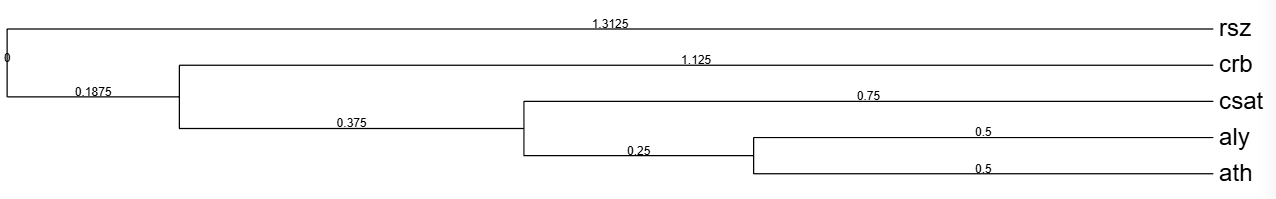

In [7]:
import numpy as np

def build_upgma_tree(distance_matrix, labels):
    """
    Args:
        distance_matrix (list of lists): Полная симметричная матрица расстояний.
        labels (list): Список названий таксонов.

    Returns:
        str: Филогенетическое дерево в формате Newick.
    """

    matrix = np.array(distance_matrix, dtype=float)
    active_clusters = {i: (label, 0.0) for i, label in enumerate(labels)}
    while matrix.shape[0] > 1:
        np.fill_diagonal(matrix, np.inf)
        min_indices = np.unravel_index(np.argmin(matrix, axis=None), matrix.shape)
        idx1, idx2 = min(min_indices), max(min_indices)
        min_dist = matrix[idx1, idx2]

        cluster1_newick, height1 = active_clusters[idx1]
        cluster2_newick, height2 = active_clusters[idx2]

        new_height = min_dist / 2.0

        branch_len1 = new_height - height1
        branch_len2 = new_height - height2

        new_newick = f"({cluster1_newick}:{branch_len1:.4f},{cluster2_newick}:{branch_len2:.4f})"

        new_distances = (matrix[idx1, :] + matrix[idx2, :]) / 2.0

        matrix = np.delete(matrix, idx2, axis=0)
        matrix = np.delete(matrix, idx2, axis=1)
        matrix = np.delete(matrix, idx1, axis=0)
        matrix = np.delete(matrix, idx1, axis=1)

        new_distances = np.delete(new_distances, [idx1, idx2])
        n = matrix.shape[0]
        new_matrix = np.zeros((n + 1, n + 1))
        new_matrix[:n, :n] = matrix
        new_matrix[n, :n] = new_distances
        new_matrix[:n, n] = new_distances

        matrix = new_matrix
        del active_clusters[idx1]
        del active_clusters[idx2]
        updated_clusters = {}
        temp_idx = 0
        for i in sorted(active_clusters.keys()):
            updated_clusters[temp_idx] = active_clusters[i]
            temp_idx += 1

        updated_clusters[n] = (new_newick, new_height)
        active_clusters = updated_clusters

    final_tree = active_clusters[0][0]
    return final_tree

matrix = [
    [0, 1, 2, 3, 1],
    [1, 0, 1, 2, 2],
    [2, 1, 0, 2, 3],
    [3, 2, 2, 0, 3],
    [1, 2, 3, 3, 0]
]
labels = ['ath', 'aly', 'csat', 'crb', 'rsz']

print("--- Дерево ---")
tree = build_upgma_tree(matrix, labels)
print(f"'{tree}'")

--- Дерево ---
'(rsz:1.3125,(crb:1.1250,(csat:0.7500,(ath:0.5000,aly:0.5000):0.2500):0.3750):0.1875)'
